In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
movies_df=pd.read_csv('movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies_df.shape

(62423, 3)

In [4]:
#data cleaning
movies_df.isnull().sum()


movieId    0
title      0
genres     0
dtype: int64

In [5]:
import re
def clean_title(title):
    return re.sub("[^a-zA-Z0-9]", " ", title)


movies title looks not good becuase it has brackets
^ -negation character class
sub - replace with space

In [6]:
movies_df['clean_title']=movies_df['title'].apply(clean_title)
movies_df.head()

,movieId,title,genres,clean_title
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji 1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men 1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale 1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II 1995


firstly recommendation system based on movie title [like similar title ex-if u watch bahubali 1 you may like bahubali 2[recommends]]
#computer genearlly understanding text by numbers so we need to convert text to numbers[vectorization]

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

TfidfVectorizer---tf term frequency, idf inverse document frequency

🧩 TF — Term Frequency
It tells how often a word appears in a document.
The more a word appears → the higher its TF.
🧠 Think of it like this:
TF shows how important a word is inside one document.
✅ Example:
Document: "I love Python. Python is fun."
Word counts:
“Python” appears 2 times
Total words = 5
So,
TF(Python) = 2 / 5 = 0.4

🧮 IDF — Inverse Document Frequency
It tells how unique or rare a word is across all documents.
Common words (like “is”, “the”) get low IDF.
Rare or special words get high IDF.
✅ Formula idea:
IDF(word) = log(Total documents / Documents containing that word)
Example:
Suppose you have 3 documents:
“I love Python”
“Python is fun”
“I love coding”
Word	Appears in how many docs	IDF (rough idea)
Python	2	low
love	2	low
coding	1	high
So “coding” is rare → more important.

⚡ Together (TF × IDF):
TF → how frequent inside a doc
IDF → how rare across docs

✅ Multiply them:
High TF × High IDF → Important unique word
High TF × Low IDF → Common word → less important

In [8]:
vectorizer=TfidfVectorizer(ngram_range=(1,2))
vectorized_data=vectorizer.fit_transform(movies_df['clean_title'])

-ngram_range=(1,2) means we are considering both unigrams and bigrams ex- "The Godfather" will be considered as "The", "Godfather", "The Godfather"
-either 2 or 1 word combinations
-vectorized_data is in sparse matrix format
-vectorized_data is a matrix where each row represents a movie and each column represents a unique word or n-gram from -the movie titles.
-The values in the matrix are the TF-IDF scores indicating the importance of each word/n-gram in the respective movie title.


In [9]:
from sklearn.metrics.pairwise import cosine_similarity
def search_movie(movie_name, top_n=10, min_score=0.20):
    """Find similar movies by title using TF-IDF + cosine similarity."""
    movie_name = clean_title(movie_name)
    if not movie_name.strip():
        return movies_df.iloc[[]]
    movie_vector = vectorizer.transform([movie_name])
    cosine_similarities = cosine_similarity(movie_vector, vectorized_data).flatten()
    if cosine_similarities.max() < min_score:
        return movies_df.iloc[[]]
    similar_movie_indices = cosine_similarities.argsort()[-top_n:][::-1]
    similar_movies = movies_df.iloc[similar_movie_indices]
    return similar_movies

#search function for finding similar movies
#reason to choose cosine similarity-because it is effective in high-dimensional spaces and text data often results in high-dimensional vectors.
 # if the input is empty after cleaning, return empty result
# transform the cleaned movie name to vector
   # find cosine similarities between input movie vector and all other movie vectors
  # if the best match is below the minimum score, treat it as no match
  # get indices of top n similar movies
   # fetch those movies from original dataframe

In [10]:
search_movie("The Godfather")

,movieId,title,genres,clean_title
53794,188155,The Godfather Legacy (2012),Documentary,The Godfather Legacy 2012
53803,188173,The Godfather Family: A Look Inside (1990),Action|Documentary|Drama,The Godfather Family A Look Inside 1990
33426,143113,GodFather (1991),Comedy|Drama|Romance,GodFather 1991
48382,176537,Herschell Gordon Lewis: The Godfather of Gore ...,Documentary|Horror,Herschell Gordon Lewis The Godfather of Gore ...
840,858,"Godfather, The (1972)",Crime|Drama,Godfather The 1972
19261,100180,"Last Godfather, The (2010)",Comedy,Last Godfather The 2010
60436,203302,The Black Godfather (2019),Documentary,The Black Godfather 2019
61634,206423,Our Godfather (2019),Crime|Documentary,Our Godfather 2019
25505,123880,The Black Godfather (1974),Action|Crime|Thriller,The Black Godfather 1974
20640,106704,Disco Godfather (1979),Action|Crime|Drama,Disco Godfather 1979


In [11]:
search_movie("Toy")

,movieId,title,genres,clean_title
4823,4929,"Toy, The (1982)",Comedy,Toy The 1982
14813,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,Toy Story 3 2010
3021,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 2 1999
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
59767,201588,Toy Story 4 (2019),Adventure|Animation|Children|Comedy,Toy Story 4 2019
58832,199484,Toy Gun (2018),Action|Comedy|Crime,Toy Gun 2018
5731,5843,Toy Soldiers (1991),Action|Drama,Toy Soldiers 1991
31704,139263,Toy Soldiers (1984),Action|Drama|Thriller,Toy Soldiers 1984
33603,143537,Toy Masters (2014),Documentary,Toy Masters 2014
15157,80141,"Christmas Toy, The (1986)",Children|Musical,Christmas Toy The 1986


In [12]:
#interactive search engine for searching similar movies using jupyter widgets-ipywidgets
import ipywidgets as widgets
from IPython.display import display
movie_input=widgets.Text(
    value='',
    placeholder='Type movie name here',
    description='Movie:',
    disabled=False
)
output=widgets.Output()
def on_value_change(data):
    val = data.get('new', '')
    with output:
        output.clear_output()
        if not str(val).strip():
            return
        similar_movies = search_movie(val, top_n=10, min_score=0.20)
        if similar_movies.empty:
            return
        display(similar_movies)
movie_input.observe(on_value_change, names='value')
display(movie_input, output)

Text(value='', description='Movie:', placeholder='Type movie name here')

Output()

#interactive search engine for searching similar movies using jupyter widgets-ipywidgets
onvalue change-called whenever the text value changes
withoutput- always clear previous output first
output.clear_output()- if the input is empty, do nothing (show nothing)
# search with a minimum similarity threshold; adjust min_score as needed
# if no good matches, show nothing
# names='value' means whenever there is a change in the value of movie_input widget, the on_value_change function will be triggered

In [13]:
ratings_df=pd.read_csv('ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [14]:
ratings_df.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [15]:
#finding users who liked same movies
movie_id=1
similar_users=ratings_df[ratings_df['movieId']==movie_id]
similar_users=similar_users[similar_users['rating']>=5]  #users who rated movie 1 with 5   or more
similar_users_ids=similar_users['userId'].unique()
similar_users_ids


array([    36,     75,     86, ..., 162518, 162519, 162530], dtype=int64)

In [16]:
#let us find that users
similar_users_recs=ratings_df[ratings_df['userId'].isin(similar_users_ids) & (ratings_df['rating']>4)]
similar_users_recs

,userId,movieId,rating,timestamp
5101,36,1,5.0,857131378
5105,36,34,5.0,834413787
5111,36,110,5.0,834412999
5114,36,150,5.0,839928587
5127,36,260,5.0,857131062
...,...,...,...,...
24998388,162530,3706,5.0,989809041
24998389,162530,3735,5.0,989808150
24998391,162530,3763,5.0,989809659
24998392,162530,4187,5.0,989809274


In [17]:
similar_users_recs.value_counts('movieId')

movieId
1         13506
318        5599
260        5464
356        4690
296        4628
          ...  
89056         1
89028         1
89018         1
88889         1
208800        1
Name: count, Length: 16797, dtype: int64

In [18]:
# let see this percentage
similar_users_recs=similar_users_recs['movieId'].value_counts()/len(similar_users_ids)
similar_users_recs

movieId
1         1.000000
318       0.414556
260       0.404561
356       0.347253
296       0.342663
            ...   
27306     0.000074
71732     0.000074
4739      0.000074
190187    0.000074
97957     0.000074
Name: count, Length: 16797, dtype: float64

In [19]:
#let us select only above 10% from this recommendations
similar_users_recs=similar_users_recs[similar_users_recs>0.1]
similar_users_recs


movieId
1       1.000000
318     0.414556
260     0.404561
356     0.347253
296     0.342663
          ...   
1259    0.102991
7361    0.101881
1206    0.101362
1307    0.101066
1208    0.100918
Name: count, Length: 92, dtype: float64

In [20]:
#lets us find this all users 
all_users=ratings_df[ratings_df['movieId'].isin(similar_users_recs.index) & (ratings_df['rating']>4) ]
all_users

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
29,1,4973,4.5,1147869080
48,1,7361,5.0,1147880055
72,2,110,5.0,1141416589
76,2,260,5.0,1141417172
...,...,...,...,...
25000055,162541,4973,4.5,1240950790
25000057,162541,4993,5.0,1240952610
25000065,162541,5952,5.0,1240952617
25000078,162541,7153,5.0,1240952613


In [21]:
all_user_recs = all_users["movieId"].value_counts() / len(all_users["userId"].unique())
all_user_recs

movieId
318      0.345282
296      0.287220
2571     0.246217
356      0.237370
593      0.227930
           ...   
1387     0.047886
1307     0.046195
745      0.037362
78499    0.035445
2355     0.025316
Name: count, Length: 92, dtype: float64

In [22]:
rec_percentages = pd.concat([similar_users_recs, all_user_recs], axis=1)
rec_percentages.columns = ["similar", "all"]
rec_percentages


,similar,all
movieId,,
1,1.000000,0.125844
318,0.414556,0.345282
260,0.404561,0.224195
356,0.347253,0.237370
296,0.342663,0.287220
...,...,...
1259,0.102991,0.049349
7361,0.101881,0.105172
1206,0.101362,0.087500


#this tells us which movies are more popular among similar users compared to the general user base
#similar-users column shows the percentage of similar users who liked each movie
#all-column shows the percentage of all users who liked each movie

In [23]:
rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]

In [24]:
rec_percentages = rec_percentages.sort_values("score", ascending=False)

In [25]:
rec_percentages.head(10).merge(movies_df, left_index=True, right_on="movieId")

,similar,all,score,movieId,title,genres,clean_title
0,1.000000,0.125844,7.946323,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
3021,0.295498,0.054186,5.453383,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 2 1999
2264,0.124685,0.025316,4.925186,2355,"Bug's Life, A (1998)",Adventure|Animation|Children|Comedy,Bug s Life A 1998
14813,0.138161,0.035445,3.897906,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,Toy Story 3 2010
580,0.233674,0.068117,3.430480,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,Aladdin 1992
587,0.198949,0.060514,3.287671,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX,Beauty and the Beast 1991
33,0.158226,0.052696,3.002602,34,Babe (1995),Children|Drama,Babe 1995
4780,0.210647,0.071444,2.948410,4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy,Monsters Inc 2001
1047,0.143418,0.049202,2.914882,1073,Willy Wonka & the Chocolate Factory (1971),Children|Comedy|Fantasy|Musical,Willy Wonka the Chocolate Factory 1971
729,0.108322,0.037362,2.899227,745,Wallace & Gromit: A Close Shave (1995),Animation|Children|Comedy,Wallace Gromit A Close Shave 1995


In [26]:
def find_similar_movies(movie_id):
    similar_users = ratings_df[(ratings_df["movieId"] == movie_id) & (ratings_df["rating"] > 4)]["userId"].unique()
    similar_user_recs = ratings_df[(ratings_df["userId"].isin(similar_users)) & (ratings_df["rating"] > 4)]["movieId"]
    similar_user_recs = similar_user_recs.value_counts() / len(similar_users)

    similar_user_recs = similar_user_recs[similar_user_recs > .10]
    all_users = ratings_df[(ratings_df["movieId"].isin(similar_user_recs.index)) & (ratings_df["rating"] > 4)]
    all_user_recs = all_users["movieId"].value_counts() / len(all_users["userId"].unique())
    rec_percentages = pd.concat([similar_user_recs, all_user_recs], axis=1)
    rec_percentages.columns = ["similar", "all"]
    
    rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]
    rec_percentages = rec_percentages.sort_values("score", ascending=False)
    return rec_percentages.head(10).merge(movies_df, left_index=True, right_on="movieId")[["score", "title", "genres"]]
#this function takes a movie_id as input and returns a DataFrame of the top 10 recommended movies based on user ratings.
#this recommendation is based on the preferences of users who liked the input movie.
find_similar_movies(2)

,score,title,genres
1,57.008249,Jumanji (1995),Adventure|Children|Fantasy
156,18.757121,Casper (1995),Adventure|Children
313,14.880390,"Santa Clause, The (1994)",Comedy|Drama|Fantasy
578,9.382034,Home Alone (1990),Children|Comedy
495,8.711980,Mrs. Doubtfire (1993),Comedy|Drama
362,8.666058,"Mask, The (1994)",Action|Comedy|Crime|Fantasy
2526,7.959267,"Mummy, The (1999)",Action|Adventure|Comedy|Fantasy|Horror|Thriller
721,7.539414,Twister (1996),Action|Adventure|Romance|Thriller
579,6.375923,Ghost (1990),Comedy|Drama|Fantasy|Romance|Thriller
312,6.231007,Stargate (1994),Action|Adventure|Sci-Fi


In [27]:
import ipywidgets as widgets
from IPython.display import display

movie_name_input = widgets.Text(
    value=' ',
    description='Movie Title:',
    disabled=False
)
recommendation_list = widgets.Output()

def on_type(data):
    with recommendation_list:
        recommendation_list.clear_output()
        title = data["new"]
        # only search if input has more than 5 characters
        if len(title) > 5:
            results = search_movie(title)
            # if no results (empty DataFrame), show nothing
            if results.empty:
                return
            # get the first (best match) movie and show recommendations
            movie_id = results.iloc[0]["movieId"]
            display(find_similar_movies(movie_id))

movie_name_input.observe(on_type, names='value')

display(movie_name_input, recommendation_list)


Text(value=' ', description='Movie Title:')

Output()

## Recommendation Insights Visualizations

### 1. Recommendation Score Comparison
Compare how similar users' preferences differ from the general user base for a given movie.

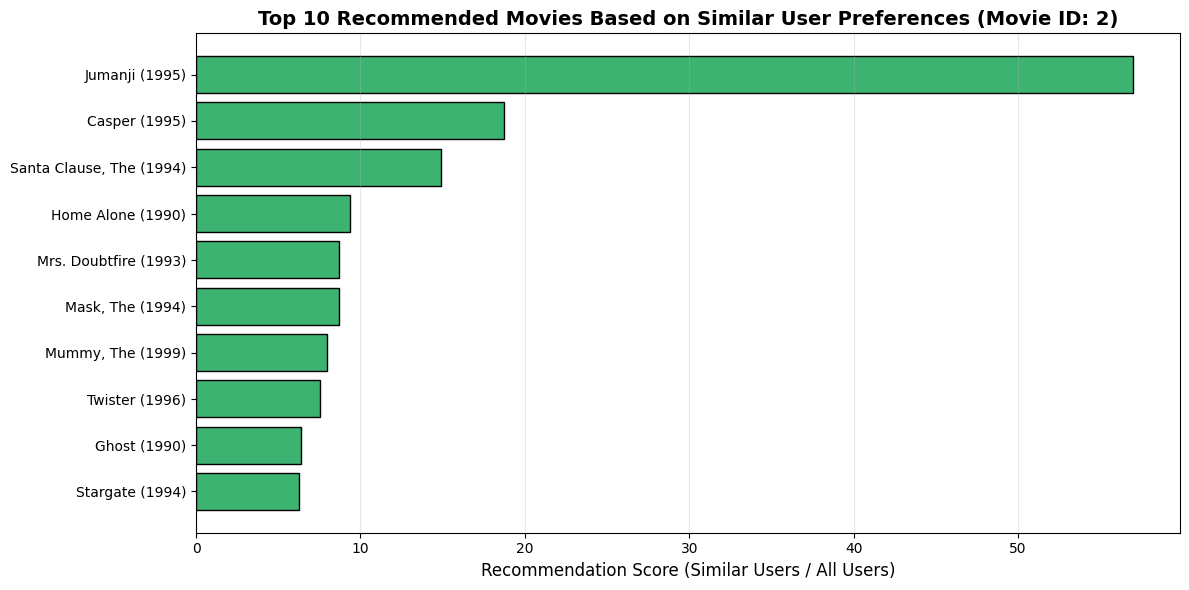

In [28]:
# Example: Visualize recommendation scores for movie ID 2
movie_id = 2
rec_data = find_similar_movies(movie_id)

# Sort by score descending
rec_data_sorted = rec_data.sort_values('score', ascending=True).tail(10)

plt.figure(figsize=(12, 6))
plt.barh(range(len(rec_data_sorted)), rec_data_sorted['score'].values, color='mediumseagreen', edgecolor='black')
plt.yticks(range(len(rec_data_sorted)), rec_data_sorted['title'].values, fontsize=10)
plt.xlabel('Recommendation Score (Similar Users / All Users)', fontsize=12)
plt.title(f'Top 10 Recommended Movies Based on Similar User Preferences (Movie ID: {movie_id})', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


### 2. Recommendation Strength by Genre
Analyze which genres are recommended most strongly for a given movie.

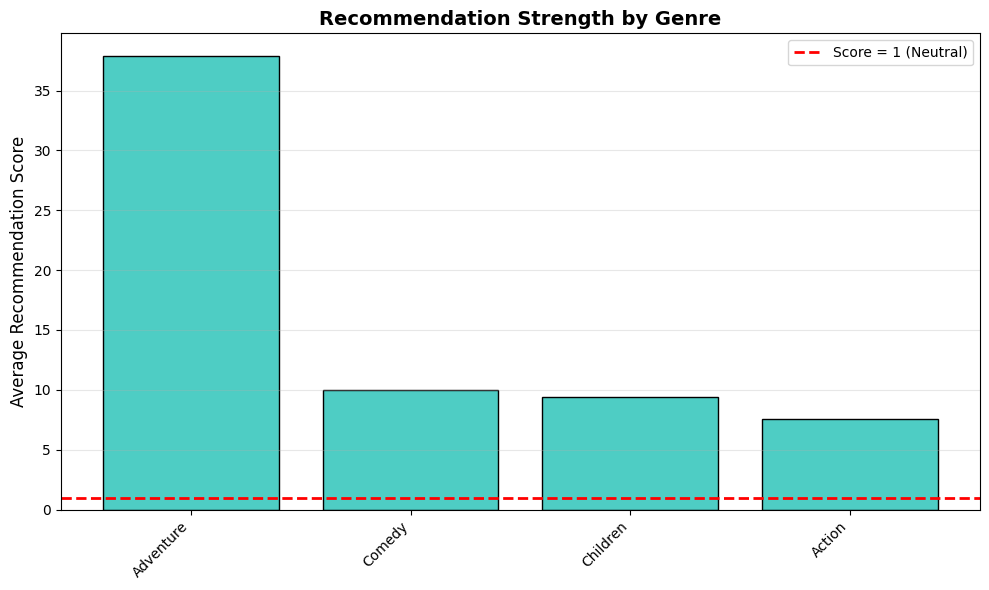

In [29]:
# Extract genre from recommendations
rec_data = find_similar_movies(2)
rec_data['primary_genre'] = rec_data['genres'].apply(lambda x: x.split('|')[0])

genre_strength = rec_data.groupby('primary_genre')['score'].agg(['mean', 'count']).sort_values('mean', ascending=False)

plt.figure(figsize=(10, 6))
colors = ['#FF6B6B' if score < 1 else '#4ECDC4' for score in genre_strength['mean']]
plt.bar(range(len(genre_strength)), genre_strength['mean'].values, color=colors, edgecolor='black')
plt.xticks(range(len(genre_strength)), genre_strength.index, rotation=45, ha='right')
plt.ylabel('Average Recommendation Score', fontsize=12)
plt.title('Recommendation Strength by Genre', fontsize=14, fontweight='bold')
plt.axhline(y=1, color='red', linestyle='--', linewidth=2, label='Score = 1 (Neutral)')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


### 3. Top Recommended Movies Across All Users
Show the most frequently recommended movies overall based on user similarity.

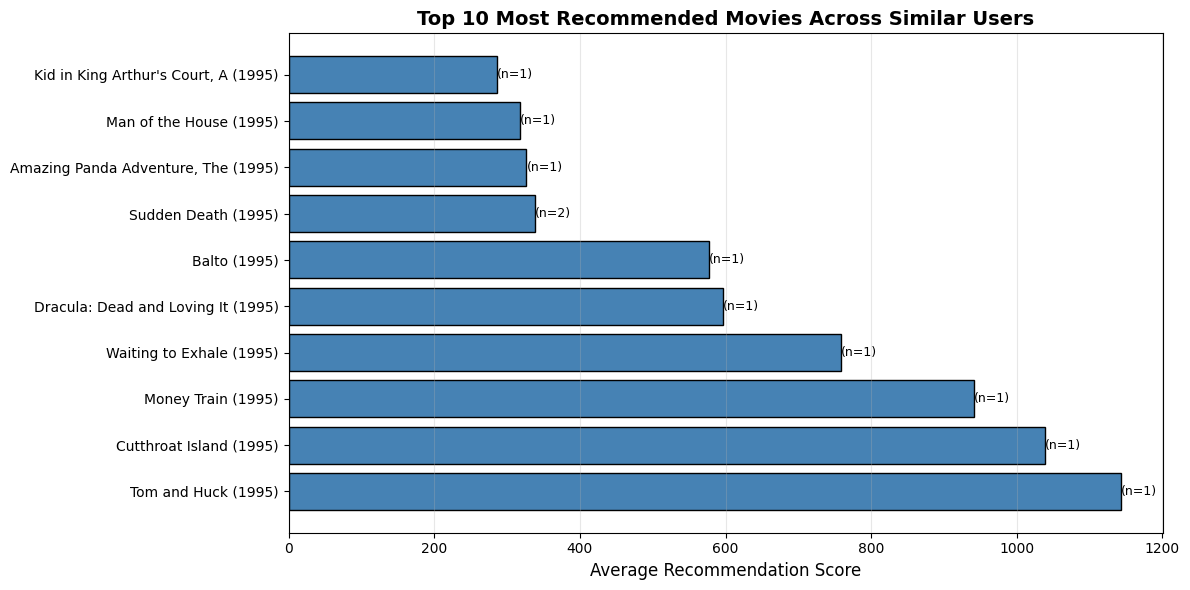

In [30]:
# Aggregate recommendation scores across multiple movies
top_recommendations = []
for movie_id in movies_df['movieId'].head(20):  # Check top 20 movies
    try:
        rec = find_similar_movies(movie_id)
        if not rec.empty:
            top_recommendations.append(rec)
    except:
        pass

if top_recommendations:
    all_recs = pd.concat(top_recommendations, ignore_index=True)
    most_recommended = all_recs.groupby('title')['score'].agg(['mean', 'count']).sort_values('mean', ascending=False).head(10)
    
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(most_recommended)), most_recommended['mean'].values, color='steelblue', edgecolor='black')
    plt.yticks(range(len(most_recommended)), most_recommended.index, fontsize=10)
    plt.xlabel('Average Recommendation Score', fontsize=12)
    plt.title('Top 10 Most Recommended Movies Across Similar Users', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    # Add count labels
    for i, (idx, row) in enumerate(most_recommended.iterrows()):
        plt.text(row['mean'] + 0.02, i, f"(n={int(row['count'])})", va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()


### 4. Similar vs All Users Preference Ratio
Visualize the ratio between similar users and all users for top recommended movies.

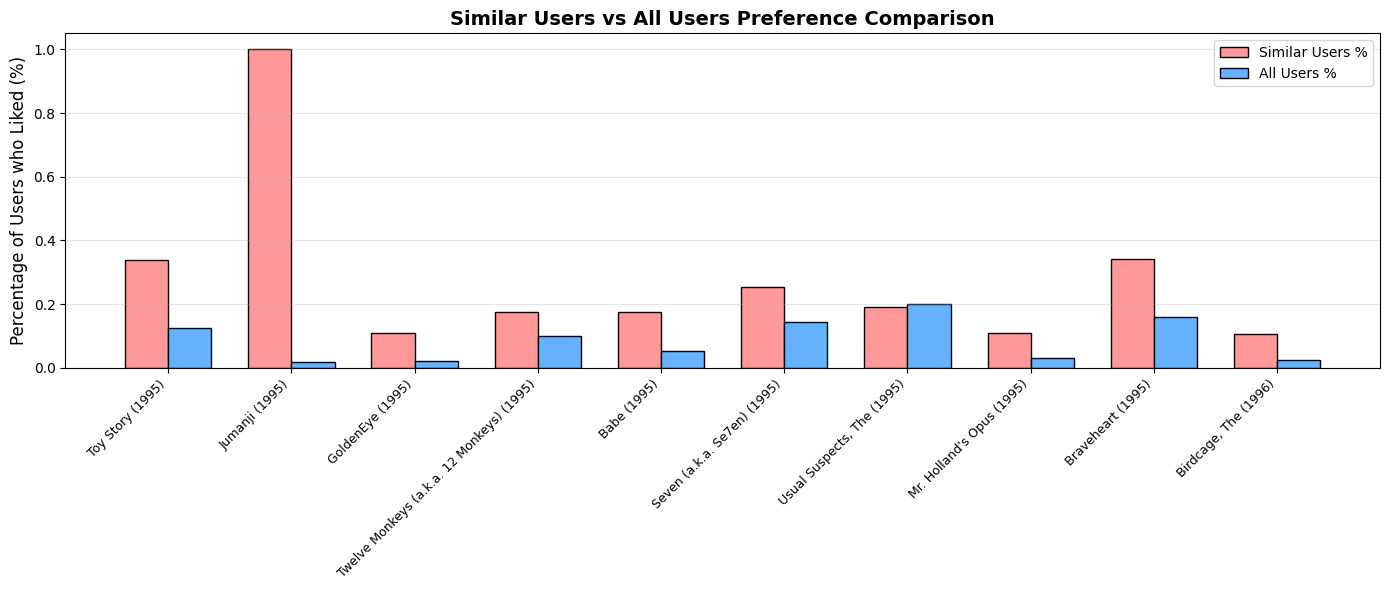

In [31]:
# Example with movie ID 2
movie_id = 2
similar_users = ratings_df[(ratings_df["movieId"] == movie_id) & (ratings_df["rating"] > 4)]["userId"].unique()
similar_user_recs = ratings_df[(ratings_df["userId"].isin(similar_users)) & (ratings_df["rating"] > 4)]["movieId"]
similar_user_recs = similar_user_recs.value_counts() / len(similar_users)
similar_user_recs = similar_user_recs[similar_user_recs > .10]

all_users_data = ratings_df[(ratings_df["movieId"].isin(similar_user_recs.index)) & (ratings_df["rating"] > 4)]
all_user_recs = all_users_data["movieId"].value_counts() / len(all_users_data["userId"].unique())

comparison_df = pd.DataFrame({
    'Similar Users': similar_user_recs,
    'All Users': all_user_recs
}).fillna(0).head(10)

comparison_df['title'] = comparison_df.index.map(lambda x: movies_df[movies_df['movieId'] == x]['title'].values[0] if x in movies_df['movieId'].values else f"Movie {x}")

x = range(len(comparison_df))
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar([i - width/2 for i in x], comparison_df['Similar Users'], width, label='Similar Users %', color='#FF9999', edgecolor='black')
plt.bar([i + width/2 for i in x], comparison_df['All Users'], width, label='All Users %', color='#66B2FF', edgecolor='black')
plt.xticks(x, comparison_df['title'], rotation=45, ha='right', fontsize=9)
plt.ylabel('Percentage of Users who Liked (%)', fontsize=12)
plt.title('Similar Users vs All Users Preference Comparison', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
